In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

1. Загрузите данные по вариантам в ноутбук.


In [2]:
# Загружаем вариант, заголовками берем третью строку, первый столбец берем как индексы
table = pd.read_excel("Вариант 3.xlsx", header=2, index_col=0)
# Удаляем строку содержащую итоговые данные
table = table.drop(table.index[-1])
table


,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
№,,,,,,,,,,
1.0,152.0,11,М,333.0,----001---00---000--1-+0---,0(3)0(3)0(3)0(3)0(3),NaN,3.0,10.0,36.0
2.0,140.0,12,Ж,332.0,----100---01-+-000--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,4.0,14.0,36.0
3.0,137.0,11,М,328.0,--+-010---00---101--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5.0,17.0,36.0
4.0,148.0,11,М,333.0,-+--000--+01---100--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5.0,17.0,36.0
5.0,153.0,11,Ж,333.0,-+--100---00---100-+0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5.0,17.0,36.0
...,...,...,...,...,...,...,...,...,...,...
1176.0,148.0,11,М,332.0,++++222+++22+++222++2++2+++,3(3)3(3)3(3)3(3)2(3),NaN,51.0,98.0,36.0
1177.0,148.0,11,М,330.0,++++222+++22+++222++2++2+++,3(3)3(3)3(3)3(3)2(3),NaN,51.0,98.0,36.0
1178.0,152.0,11,Ж,330.0,++++222+++22+++222++2++2+++,3(3)3(3)3(3)2(3)3(3),NaN,51.0,98.0,36.0


2. Сделайте описательную статистику полученных данных.


In [3]:
table.describe()


,№ школы,Номер варианта,Первичный балл,Балл,Минимальный балл
count,1180.000000,1180.000000,1180.000000,1180.000000,1180.0
mean,141.312712,329.559322,23.699153,52.047458,36.0
std,30.796792,39.578149,10.480897,14.965477,0.0
min,111.000000,101.000000,3.000000,10.000000,36.0
25%,133.000000,329.000000,15.000000,41.000000,36.0
50%,146.000000,330.000000,22.000000,49.000000,36.0
75%,152.000000,332.000000,31.250000,60.250000,36.0
max,1106.000000,506.000000,52.000000,100.000000,36.0


3. Найдите процент учащихся, выполнивших работу ниже среднего.


In [4]:
# Для каждой строки указываем меньше ли балл чем средний, считаем количество True через сумму
le = (table["Балл"] < table["Балл"].mean()).sum()

# Переводим в проценты
f"{le / len(table):.3%}"

'56.271%'

4. Найти процент учащихся не сдавших экзамен.


In [5]:
# Находим стрки где балл меньше минимального
lose = (table["Балл"] < table["Минимальный балл"]).sum()

f"{lose / len(table):.3%}"

'7.712%'

5. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.


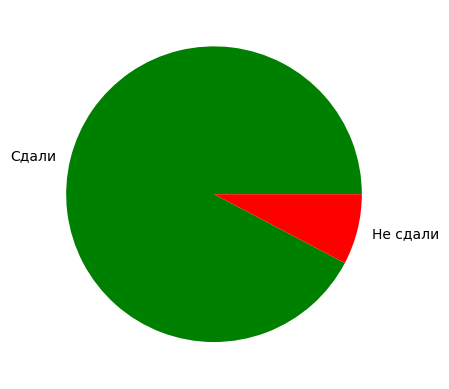

In [6]:
# Считаем количество не сдавших
failed = (table["Балл"] < table["Минимальный балл"]).sum()
# Считаем количество сдавших
passed = len(table) - failed
plt.pie(
    [passed, failed],
    labels=["Сдали", "Не сдали"],
    colors=["g", "r"],
)
None

6. Постройте ядерную оценку плотности распределению баллов за экзамен.


<Axes: ylabel='Density'>

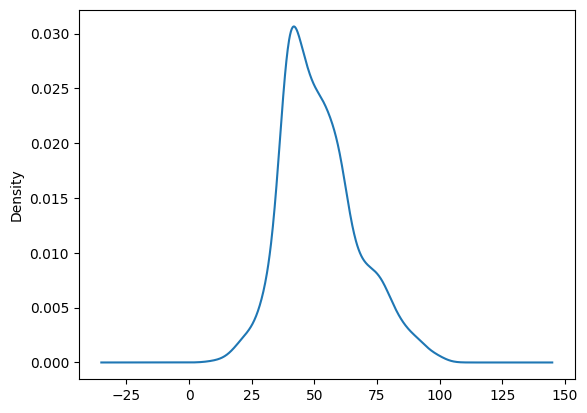

In [7]:
table["Балл"].plot.kde()

7. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».


In [8]:
great = (table["Балл"] > 75).sum()
well = (table["Балл"] > 50).sum() - great
sat = (table["Балл"] > 25).sum() - great - well
unsat = len(table) - great - well - sat
good = np.array([great, well, sat, unsat]) / len(table)
print(
    "Отлично: {:.3%}\nХорошо: {:.3%}\nУдовлетворительно: {:.3%}\nНеудовлетворительно: {:.3%}\n".format(
        *good
    )
)

Отлично: 9.153%
Хорошо: 40.424%
Удовлетворительно: 48.390%
Неудовлетворительно: 2.034%



8. Какое процентное соотношение юношей и девушек писало данный экзамен?


In [9]:
male = (table["Пол"] == "М").sum()
female = (table["Пол"] == "Ж").sum()
print(f"Юноши: {male/len(table):.3%}\nДевушки: {female/len(table):.3%}")

Юноши: 68.644%
Девушки: 31.356%


9. Сколько школ принимало участие в экзамене?


In [10]:
# Берем уникальные значения из столбца с номрами школ и считаем их кол-во
len(table["№ школы"].unique())

19

10. Сколько всего заданий с кратким ответом? С развернутым ответом?


In [11]:
# short_ans_count = len(table['Задания с кратким ответом'].iloc[0])
long_ans = len(table['Задания с развёрнутым ответом'].iloc[0])//4
short_ans = len(table['Задания с кратким ответом'].iloc[0])
print(f"Задания с длинным ответом {long_ans}\nЗадания с коротким ответом {short_ans}")

Задания с длинным ответом 5
Задания с коротким ответом 27


11. Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: $В_1$, ... $В_к$ Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.


In [12]:
typeB = pd.DataFrame([*table['Задания с кратким ответом'].map(list).values])
typeB

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-,-,-,-,0,0,1,-,-,-,...,0,-,-,1,-,+,0,-,-,-
1,-,-,-,-,1,0,0,-,-,-,...,0,-,-,0,-,-,1,-,-,-
2,-,-,+,-,0,1,0,-,-,-,...,1,-,-,0,-,-,1,-,-,-
3,-,+,-,-,0,0,0,-,-,+,...,0,-,-,0,-,-,1,-,-,-
4,-,+,-,-,1,0,0,-,-,-,...,0,-,+,0,-,-,1,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,+,+,+,+,2,2,2,+,+,+,...,2,+,+,2,+,+,2,+,+,+
1176,+,+,+,+,2,2,2,+,+,+,...,2,+,+,2,+,+,2,+,+,+
1177,+,+,+,+,2,2,2,+,+,+,...,2,+,+,2,+,+,2,+,+,+
1178,+,+,+,+,2,2,2,+,+,+,...,2,+,+,2,+,+,2,+,+,+


In [13]:
# Считаем процент выполненых (+ или 1)
(((typeB == "+") | (typeB == '1')).sum()/len(typeB)).map(lambda x: f"{x:.3%}")

0     85.339%
1     86.864%
2     62.203%
3     44.492%
4     44.407%
5     36.780%
6     27.712%
7     65.593%
8     73.983%
9     35.000%
10    45.169%
11    31.780%
12    56.610%
13    51.017%
14    42.542%
15    63.729%
16    36.271%
17    42.034%
18    81.949%
19    75.085%
20    32.119%
21    50.763%
22    62.034%
23    39.831%
24    29.915%
25    36.949%
26    29.746%
dtype: object

12. Аналогично и с типом С (ответы с развернутым ответом)


In [14]:
# Берем все задания с развернутым ответом, и приводим к новому датафрейму
# Новый датасет содержит данные на сколько выполнено задание

def parse_C(value):
    a = np.array(list(map(int, value[::4])))
    t = np.array(list(map(int, value[2::4])))
    return a / t
typeC = pd.DataFrame([*table['Задания с развёрнутым ответом'].map(parse_C).values])
typeC

,0,1,2,3,4
0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...
1175,1.0,1.0,1.0,1.000000,0.666667
1176,1.0,1.0,1.0,1.000000,0.666667
1177,1.0,1.0,1.0,0.666667,1.000000
1178,1.0,1.0,1.0,1.000000,1.000000


In [15]:
# Вычисляем процентное соотношение и выводим в соответствующем виде
((typeC == 1).sum()/len(typeC)).map(lambda x: f"{x:.3%}")

0     2.119%
1    13.983%
2     6.525%
3     1.017%
4     9.661%
dtype: object

13. Сделайте анализ по двум школам:
    1. по всем выполненным заданиям типа В
    2. по заданиям типа С больше 50%
    3. по среднему баллу юношей и девушек


In [16]:
school1 = table[table['№ школы'] == table['№ школы'].unique()[0]]
school2 = table[table['№ школы'] == table['№ школы'].unique()[1]]

In [17]:
def mean_score(df):
    # Средний балл юношей и девушек
    male = df[df['Пол'] == 'М']['Балл'].mean()
    female = df[df['Пол'] == 'Ж']['Балл'].mean()
    return male, female

## Школа 1

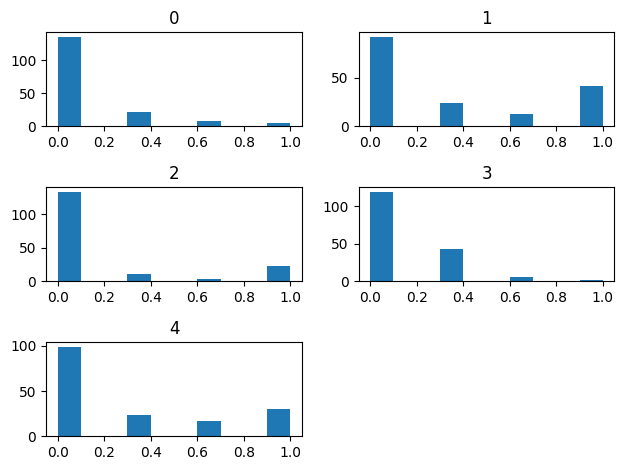

In [18]:
# Смотрим для школы гистограмму решенных C
typeC[(table['№ школы'] == table['№ школы'].unique()[0]).values].hist(grid=False)
plt.tight_layout()

<Axes: >

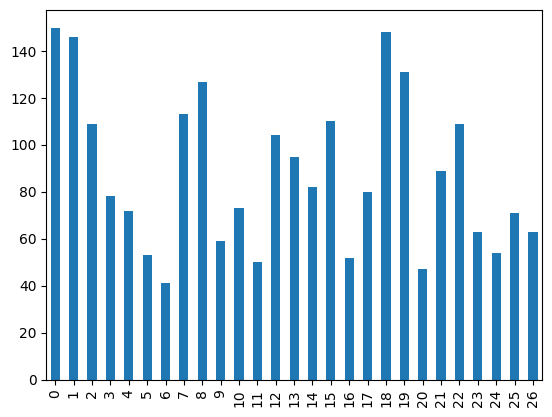

In [19]:
# Количество выполненых заданий B
data = typeB[(table['№ школы'] == table['№ школы'].unique()[0]).values]
((data == '+') | (data == '1')).sum().plot.bar()

In [20]:
# Средний балл среди юношей и девушек
print("Средний балл\nЮношей: {:.3f}\nДевушек: {:.3f}".format(*mean_score(school1)))

Средний балл
Юношей: 53.899
Девушек: 58.118


## Школа 1

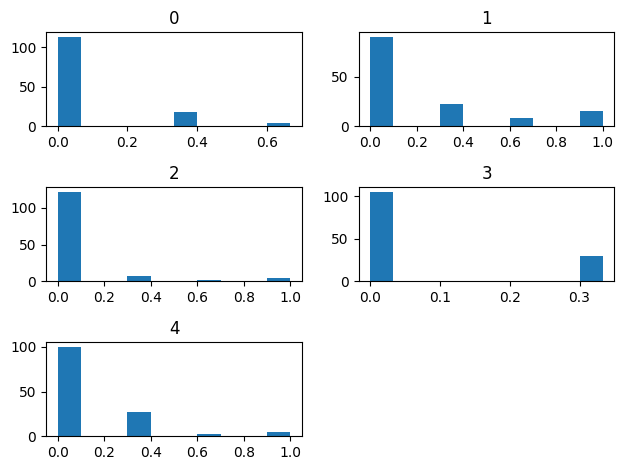

In [21]:
# Смотрим для школы гистограмму решенных C
typeC[(table['№ школы'] == table['№ школы'].unique()[1]).values].hist(grid=False)
plt.tight_layout()

<Axes: >

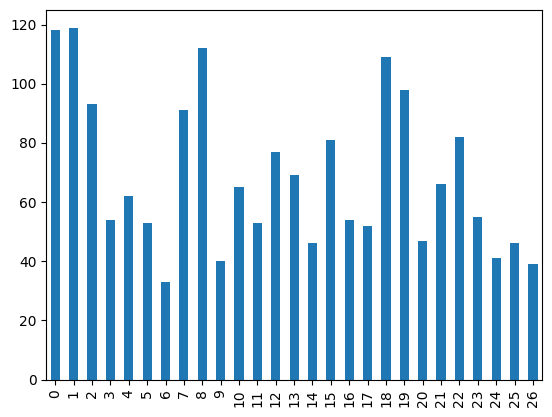

In [22]:
# Количество выполненых заданий B
data = typeB[(table['№ школы'] == table['№ школы'].unique()[1]).values]
((data == '+') | (data == '1')).sum().plot.bar()

In [23]:
# Средний балл среди юношей и девушек
print("Средний балл\nЮношей: {:.3f}\nДевушек: {:.3f}".format(*mean_score(school2)))

Средний балл
Юношей: 50.648
Девушек: 49.545
